# Simple Linear Regression 簡單線性迴歸

課程範例程式及資料檔下載網址： https://www.superdatascience.com/machine-learning/

## Importing the Libraries 載入套件

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

> [Note]
+ `%matplotlib notebook` 把圖畫在 Jupyter Notebook 中

## Importing the Dataset 讀入資料

利用 pd.read_csv 來載入資料，這組資料是一個 30 列(row) 2 行(column) 的薪資資料。
想要了解 YearsExperience 與 Salary 之間的關係。

In [3]:
path = '/Users/sun/Desktop/Machine-Learning-A-Z/Part 2 - Regression/2-1 - Simple Linear Regression/'
dataset = pd.read_csv( path+'Salary_Data.csv' )

In [4]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Dependent & independent variables 定義解釋變數及反應變數

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

## Simple Linear Regression Intuition

#### Simple Linear Regression 簡單線性迴歸
公式如下：
$$
y = b_0 + b_1\times x_1
$$
+ $y$ : Dependent Variable 反應變數 
+ $x_1$ : Independent Variable 解釋變數 (在簡單線性迴歸中只會有一個 $x_1$)
+ $b_0$ : Constant 常數項 
+ $b_1$ : Coefficient $x_1$的係數 (在簡單線性迴歸中 $b_1$也是斜率)

![](plot_2_1_1.png)

以剛剛的 dataset 為例，想了解 YearsExperience 與 Salary 之間的關係 <br>
套用在簡單線迴歸的公式中可以表示成：
$$
Salary = b_0 + b_1\times Experience
$$
假設
+ $b_0 = 30000$  : 當一個剛出社會沒有工作經驗的人，一開始的起薪為 30000
+ $b_1 = 10000$  : 每當年增多增加一年薪水可以增加的幅度為 10000

> [Note] <br>
> 1. 斜率( $b_1$)越大，表示年資增加一年調整薪水的幅度越大
> 2. 斜率( $b_1$)越小，表示年資增加一年調整薪水的幅度越小

#### Ordinary Least Squares 最小平方法
+ $y_i$ : 實際上的觀測點 
+ $\hat{y_i}$ : Model 上的預測點

希望 $y_i$ 與 $\hat{y_i}$ 距離越近越好，所以利用最小平方法來找到最適合的迴歸線

![](plot_2_1_2.png)

## Splitting the dataset into the Training set and Test set 切分訓練及測試樣本

+ Training set : 用來建立 Model
+ Test set : 拿來跟 Model 預測出來的值做驗證，以確定 Model 的好壞

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

> [Note] <br>
> 1. 這裡是拿 1/3 去當 Test set , 2/3 去當 Training set

## Fitting Simple Linear Regression to the Training set

拿 Training set 建立 Simple Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predicting the Test set results

將 Test set 丟入，已經建立好的 Simple Linear Regression Model 中

In [10]:
y_pred = regressor.predict(X_test)

# Visualising the results

#### The Training set 

<IPython.core.display.Javascript object>


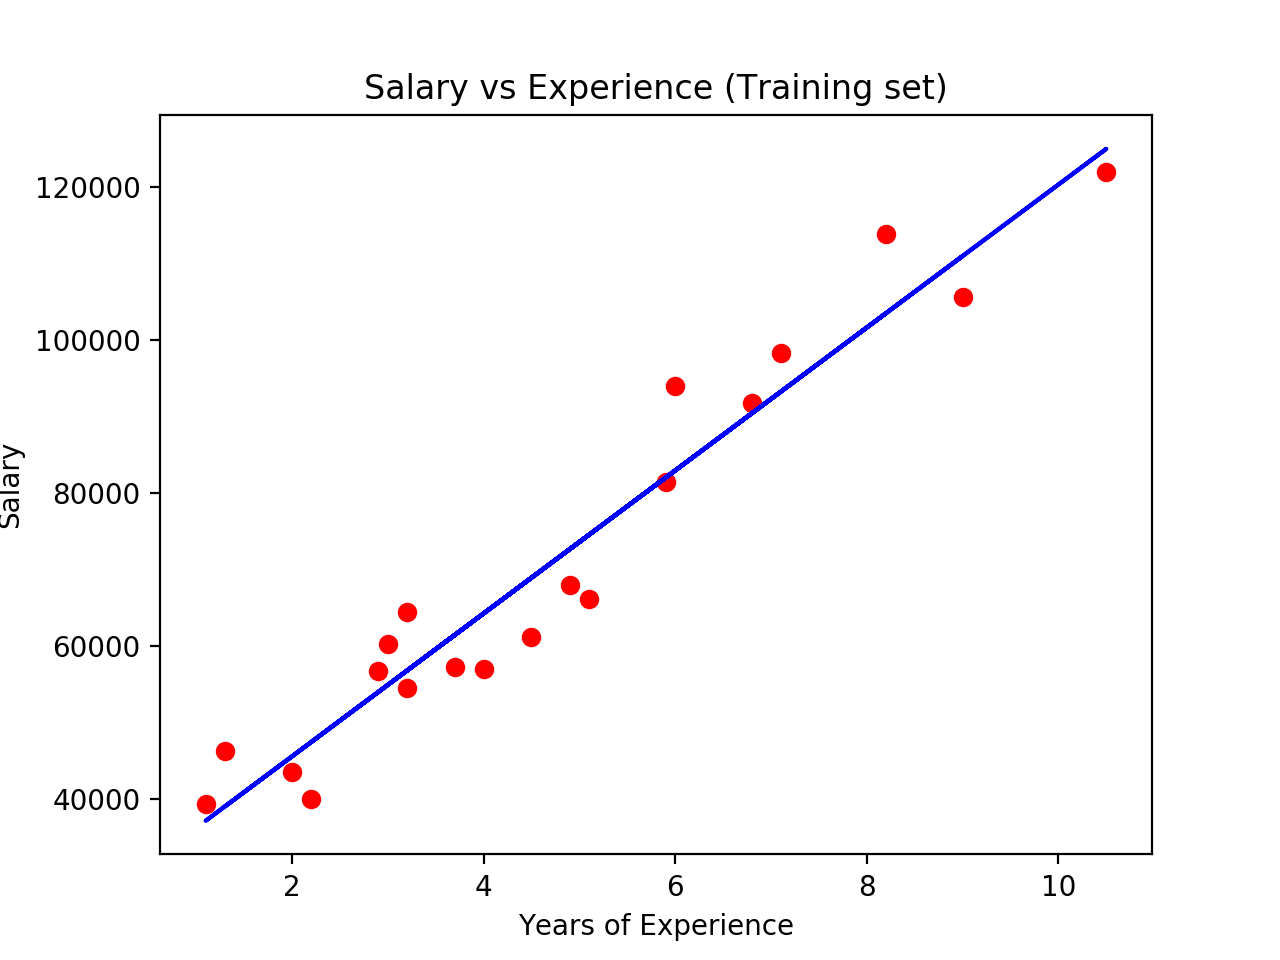

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### The Test set

<IPython.core.display.Javascript object>


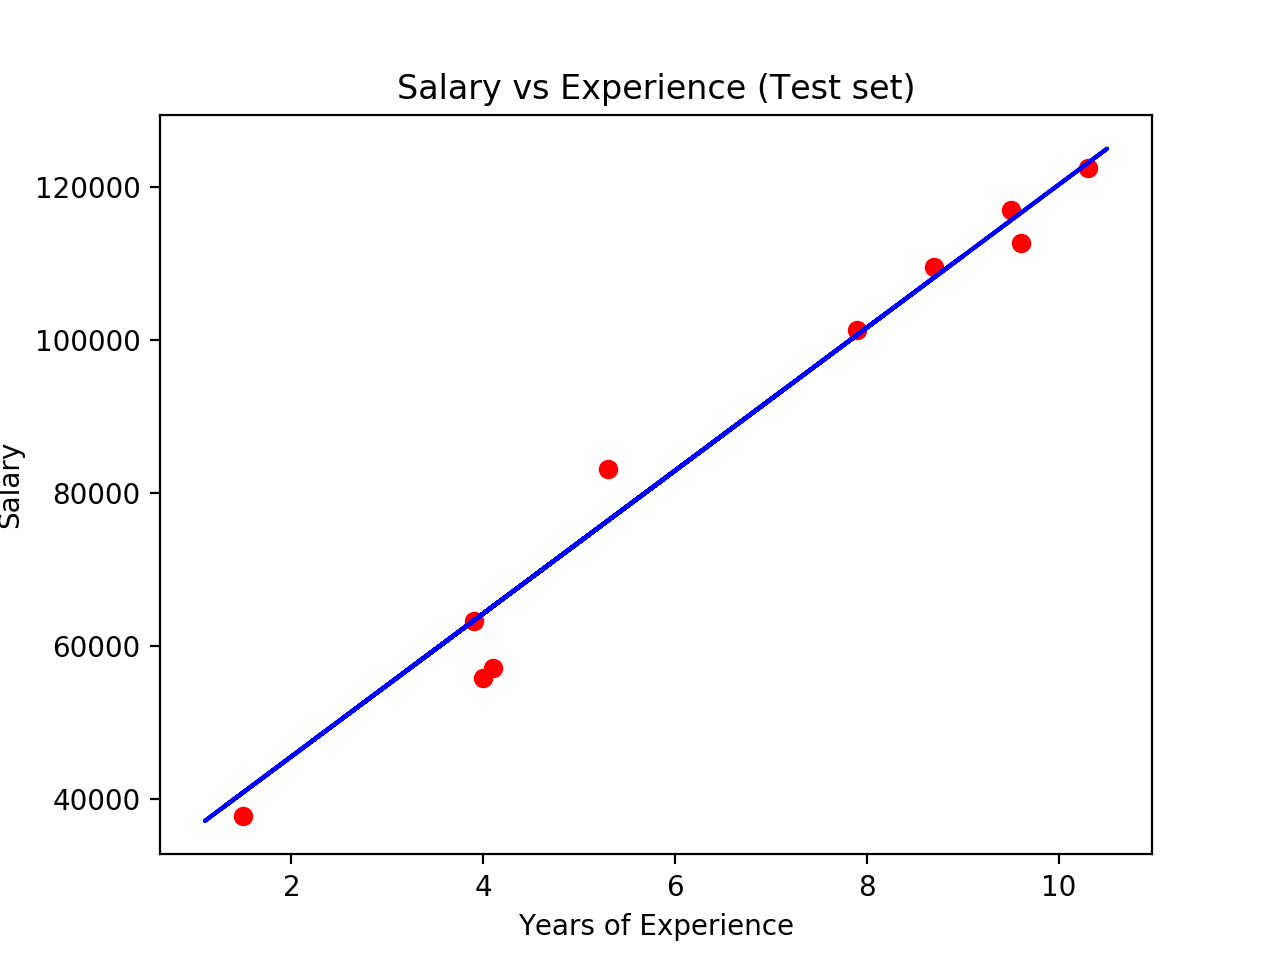

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [15]:
regressor.predict(X_train)

array([  53919.42532909,   74480.49870396,   56723.20806202,
         68872.93323808,  103452.92027763,   90368.60085726,
         38965.91742009,  124948.58789682,   54854.0195734 ,
         47377.2656189 ,   81957.25265845,   82891.84690277,
         61396.17928358,   56723.20806202,  110929.67423213,
         45508.07713028,   37096.72893147,   93172.3835902 ,
         72611.31021533,   64199.96201652])